## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
- Regression is a technique used to predict continuous outcomes. It involves estimating the relationships among variables, where the output variable (dependent variable) is continuous.
- Classification is used when the output variable is categorical or discrete. The goal is to assign input data into predefined classes or categories.

2. What is a confusion table? What does it help us understand about a model's performance?
- A confusion table is a cross-tabulation of predicted and actual values. It helps to summarize the results of predictions made by a model compared to the actual outcomes, like if something is true negative or true positive.

3. What does the SSE quantify about a particular model?
- The SSE (Sum of Squared Errors) quantifies the total deviation of the predicted values from the actual values in regression analysis. Specifically, it measures how well a model fits a dataset by calculating the sum of squared differences between each observed value and its corresponding predicted value

4. What are overfitting and underfitting?
- Overfitting occurs when a model learns not only the underlying patterns in training data but also noise or random fluctuations within that data set. This results in high accuracy on training data but poor generalization to unseen data due to excessive complexity often characterized by too many parameters relative to observations.

- Underfitting happens when a model is too simple to capture the underlying structure of the data effectively. This leads to poor performance on both training and testing datasets because it fails to learn enough from the training data.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
- Splitting data into training and testing sets allows for an unbiased evaluation of a model’s performance on unseen data. The training set is used to train or fit the model while the testing set serves as an independent dataset to assess how well this trained model can predict outcomes for new instances.

- Choosing k helps ensure that selected parameters lead to better generalization rather than just fitting noise present in training data. This process mitigates overfitting by validating that improvements seen during training hold true when applied outside that context.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
- Class Labels: Reporting class labels provides clear-cut decisions about which category an instance belongs to. The strength of this approach lies in its simplicity; however, it lacks nuance regarding uncertainty—meaning it does not convey how confident we are about those classifications.

- Probability Distributions: Providing probabilities offers richer information about predictions by indicating confidence levels associated with each class label. This approach allows for more informed decision-making especially in scenarios where thresholds can be adjusted based on risk tolerance or business needs; however, it may complicate interpretation if users are not familiar with probabilistic outputs.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
import pandas as pd

In [ ]:
#1: Loading dataset
data = pd.read_csv('USA_cars_datasets.csv')
data.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
data = data[['price', 'year', 'mileage']]

In [ ]:
print(data.isna().sum())

price      0
year       0
mileage    0
dtype: int64


In [ ]:
data.head(5)

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    2499 non-null   int64
 1   year     2499 non-null   int64
 2   mileage  2499 non-null   int64
dtypes: int64(3)
memory usage: 58.7 KB
None


In [ ]:
print(data.shape)

(2499, 3)


In [ ]:
#2: Normalize year and mileage
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['year', 'mileage']] = scaler.fit_transform(data[['year', 'mileage']])

data.head(5)

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [ ]:
#3: Split data into ~80% for training and ~20% for evaluation.
from sklearn.model_selection import train_test_split

X = data[['year', 'mileage']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1999, 2)
Test set size: (500, 2)


In [ ]:
#4: Apply k-NN Regression for Different k Values
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]
MSE_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    MSE_values.append(MSE)

for i in range(len(k_values)):
    print(f"k={k_values[i]}: MSE={MSE_values[i]}")

k=3: MSE=148065935.51955554
k=10: MSE=117399126.10604002
k=25: MSE=112576160.82390079
k=50: MSE=110202549.3014296
k=100: MSE=112253702.9700672
k=300: MSE=114496092.28682345


As k increases, the MSE values decrease significantly.

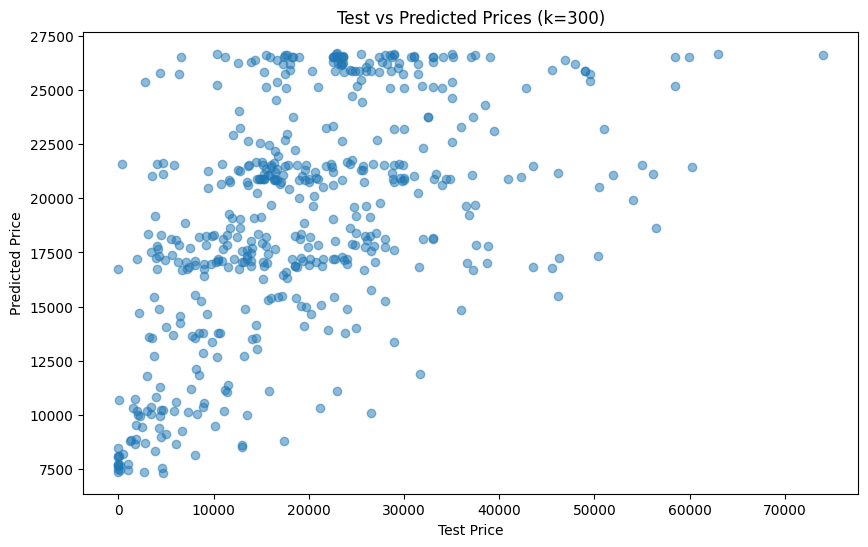

In [ ]:
# Scatterplot of actual vs predicted prices for current k value
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title(f'Test vs Predicted Prices (k={k})')
plt.xlabel('Test Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
#5: Determine the optimal k for these data
import numpy as np

optimal_k_index = np.argmin(MSE_values)
optimal_k = k_values[optimal_k_index]

print(optimal_k)

50


6. What happened in the plots of predicted versus actual prices as k varied
- Small k Values (e.g., k=3):

  a) When k was set to a small value like 3, the model exhibited a high degree of sensitivity to the training data. The scatterplot showed points closely following the actual values, indicating that predictions were highly accurate for individual instances. However, this also led to significant fluctuations and noise in predictions due to overfitting.
  
  b) Overfitting: The model captured not only the general trend but also the noise present in the training data. As a result, while it performed well on training data, its performance on unseen test data could be poor because it was too tailored to specific examples rather than generalizable patterns.

- Moderate k Values (e.g., k=10 or k=25):
  
  a) As we increased k to moderate values like 10 or 25, the scatterplot showed a more balanced representation between predicted and actual prices. The points started forming a tighter cluster around the line of equality (y=x), indicating better overall predictive performance.

  b) In this range, there was a reduction in variance without significantly increasing bias. The model became less sensitive to noise and began capturing broader trends within the data.

- Large k Values (e.g., k=100 or k=300):

  a) With larger values of k such as 100 or 300, the scatterplot displayed a noticeable shift. The points tended to cluster around a central line but with greater distance from actual values compared to smaller k values.

  b) Underfitting: At these high values of k, predictions became overly generalized. While this reduced variance and made predictions more stable across different datasets, it also meant that important nuances and relationships within the data were lost. Consequently, while there was less fluctuation in predictions, accuracy suffered as meaningful variations were averaged out.


  - In summary, as k varied from small to large values:
  
  a) Small k resulted in overfitting with high variance and low bias.

  b) Moderate k provided an optimal balance between bias and variance.

  c) Large k led to underfitting with high bias and low variance.


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.